## **Import Libraries**


## **Dataset**

In [1]:
## Conection with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dir_path = '/content/drive/MyDrive'
for filename in os.listdir(dir_path):
    file_path = os.path.join(dir_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
    except Exception as e:
        print(f'Error deleting file {file_path}: {e}')


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set the path to your dataset folder
dataset_path = '/content/drive/MyDrive/project_phase_2/data'

# Get a list of all subfolders (i.e., classes) in the dataset folder
class_names = os.listdir(dataset_path)

# Initialize empty lists to store image data and labels
data = []
labels = []

# Loop over all subfolders and load the images
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)
        data.append(np.array(image))
        labels.append(class_name)

# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

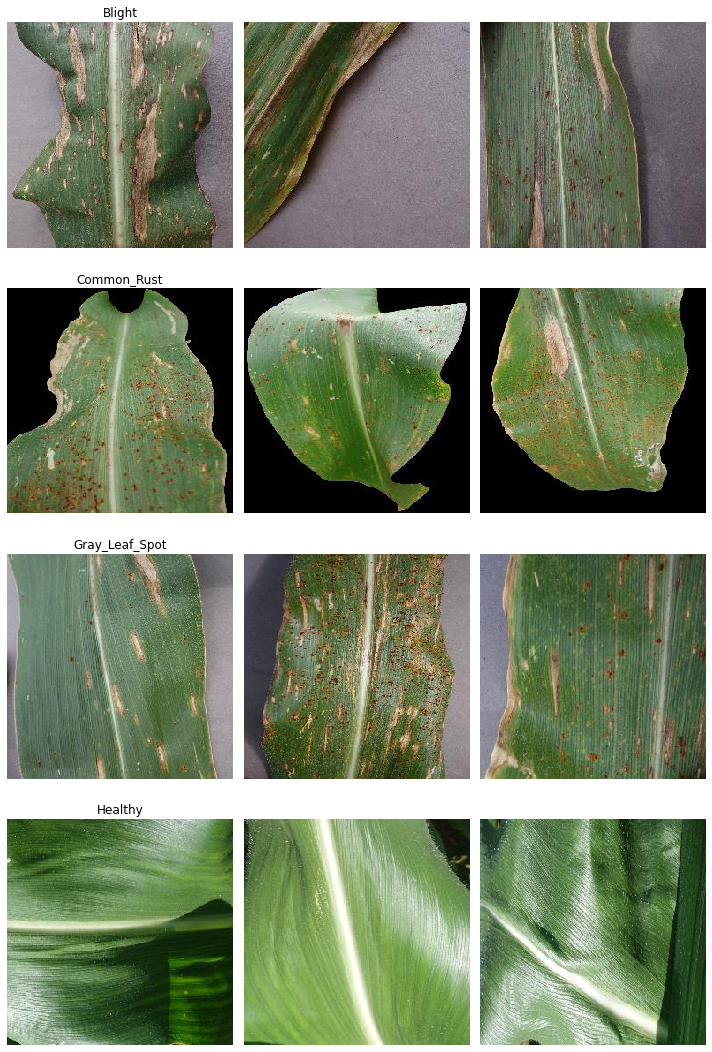

In [ ]:
# Plot three sample images from each class
fig, axes = plt.subplots(len(class_names), 3, figsize=(10, 15))
for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == class_name)[0]
    sample_indices = np.random.choice(class_indices, size=3, replace=False)
    for j, index in enumerate(sample_indices):
        axes[i, j].imshow(data[index], interpolation='nearest')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(class_name)
plt.tight_layout()
plt.show()

In [ ]:
# Print some basic statistics about the dataset
print('Number of images:', len(data))
print('Label distribution:', dict(zip(*np.unique(labels, return_counts=True))))

Number of images: 3852
Label distribution: {'Blight': 985, 'Common_Rust': 1192, 'Gray_Leaf_Spot': 513, 'Healthy': 1162}


In [ ]:
print(data.shape)
print(data[0].shape)

(3852, 256, 256, 3)
(256, 256, 3)


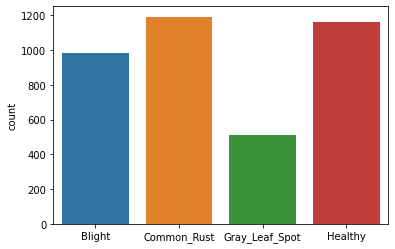

In [ ]:
# Plot a histogram of the label distribution
sns.countplot(x=labels)
plt.show()

##**Saving and Splitting Data without Augumentation & Balancing**

In [2]:
import os
##Create train and test files
try:
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP')

    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Blight')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Common_Rust')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Healthy')

    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Blight')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Common_Rust')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Healthy')

    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Blight')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Common_Rust')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Healthy')
except OSError:
    print("Error")

In [3]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, VALIDATION, TESTING):
    
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name
        
        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
    
    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/data/Blight/'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/data/Common_Rust/'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/data/Gray_Leaf_Spot/'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/data/Healthy/'

TRAINING_Blight_DIR = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Blight/'
TRAINING_Common_Rust_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Blight/'
VALIDATION_Common_Rust_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Blight/'
TESTING_Common_Rust_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_WPP/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

## **Dataset Balancing**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Use RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=42)
data, labels = ros.fit_resample(data.reshape(-1, np.prod(data.shape[1:])), labels)
data = data.reshape(-1, 256, 256, 3)

In [ ]:
# Print some basic statistics about the dataset after oversampling
print('Number of images after oversampling:', len(data))
print('Label distribution after oversampling:', dict(zip(*np.unique(labels, return_counts=True))))

Number of images after oversampling: 4768
Label distribution after oversampling: {'Blight': 1192, 'Common_Rust': 1192, 'Gray_Leaf_Spot': 1192, 'Healthy': 1192}


In [ ]:
print(data.shape)
print(data[0].shape)

(4768, 256, 256, 3)
(256, 256, 3)


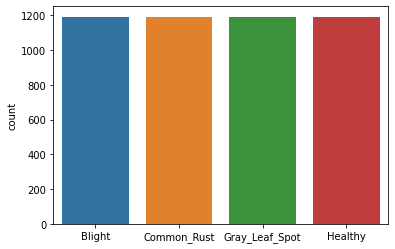

In [ ]:
# Plot a histogram of the label distribution after oversampling
sns.countplot(x=labels)
plt.show()

## **Save Balanced Data into New Folder**

In [ ]:
# create a directory to save the images into
save_dir = '/content/drive/MyDrive/project_phase_2/balanced_data'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# loop over each label name and create a subdirectory for it
for label in set(labels):
    label_dir = os.path.join(save_dir, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

from PIL import Image

def save_img(path, img):
    pil_img = Image.fromarray(img)
    pil_img.save(path, "JPEG")

# loop over each image and save it into its corresponding subdirectory
for i in range(len(data)):
    label = labels[i]
    label_dir = os.path.join(save_dir, label)
    img_path = os.path.join(label_dir, f"{i}.jpg")
    img = data[i]
    save_img(img_path, img)

## **Data Augumentation Types**

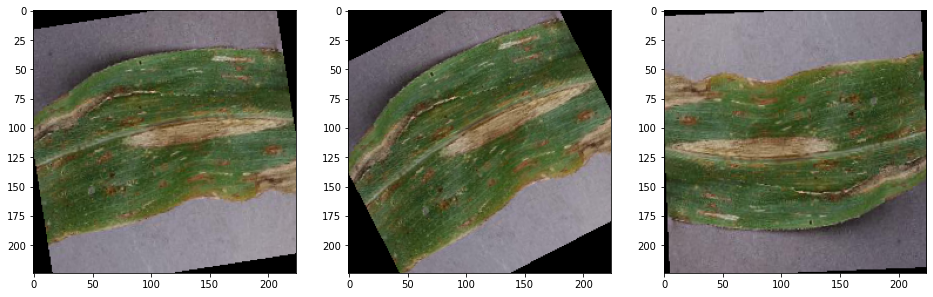

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np

image_path = '/content/drive/MyDrive/project_phase_2/data/Blight/image (1).JPG'

img = load_img(image_path, target_size= (224,224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rotation_range=120,fill_mode='constant')

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,4):
   plt.subplot(1, 3, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

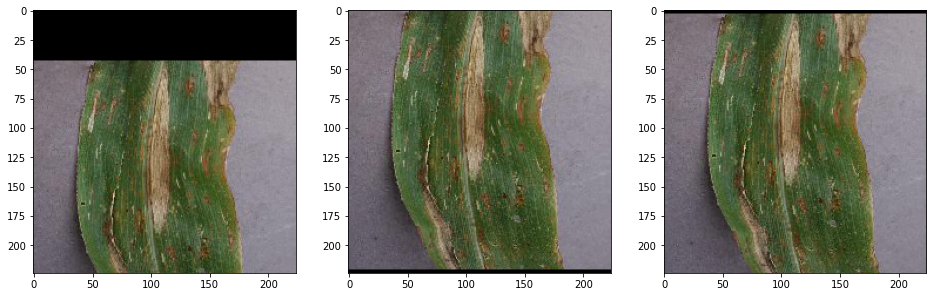

In [ ]:
# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(width_shift_range=0.2,fill_mode='constant')

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,4):
   plt.subplot(1, 3, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

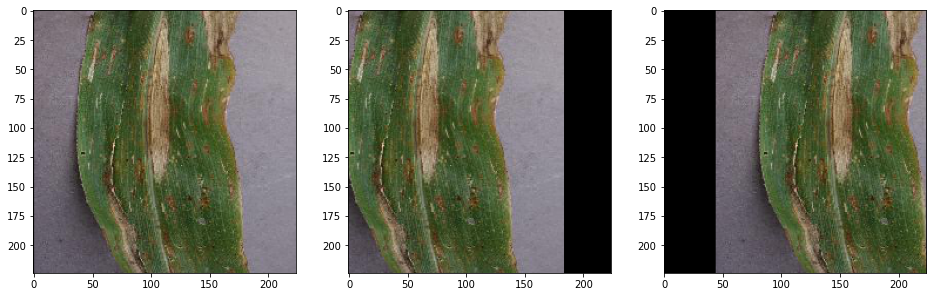

In [ ]:
# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(height_shift_range=0.2,fill_mode='constant')

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,4):
   plt.subplot(1, 3, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

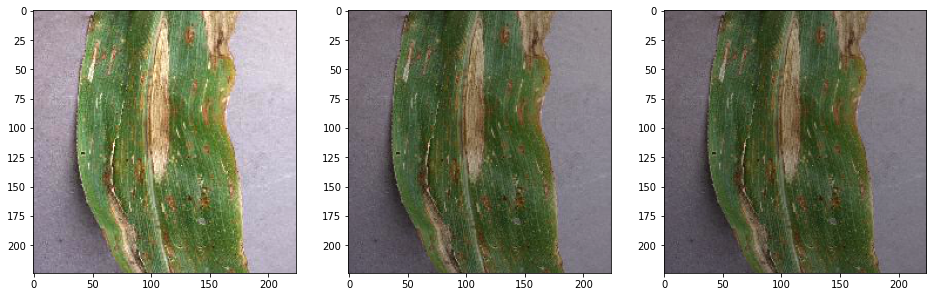

In [ ]:
# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(brightness_range=[0.7, 1.5],fill_mode='constant')

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,4):
   plt.subplot(1, 3, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

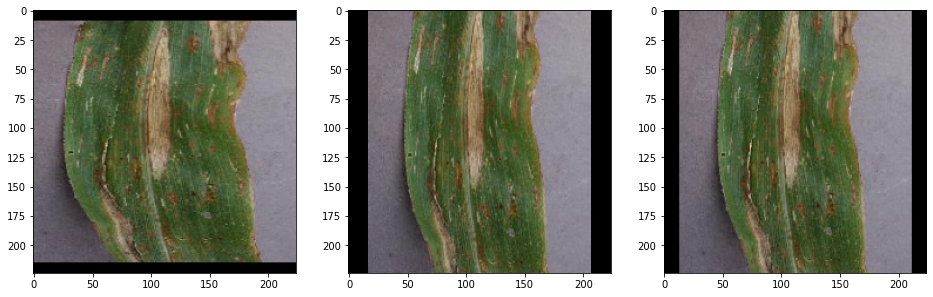

In [ ]:
# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(zoom_range=[0.7, 1.3],fill_mode='constant')

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,4):
   plt.subplot(1, 3, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

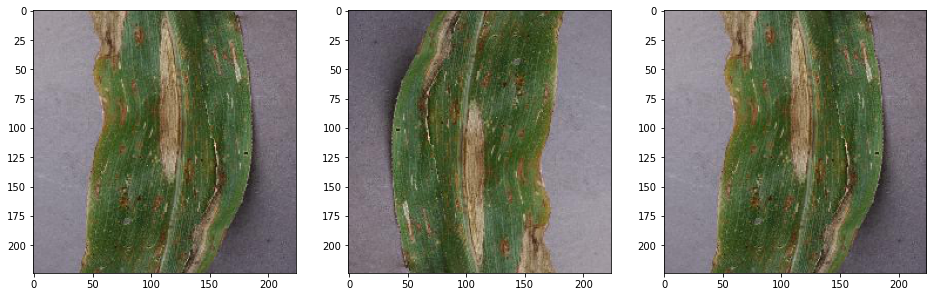

In [ ]:
# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,fill_mode='constant')

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,4):
   plt.subplot(1, 3, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

## **Data Augumentation and Save to File Storage**

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Define data directories
base_dir = '/content/drive/MyDrive/project_phase_2/balanced_data'
augmented_dir = '/content/drive/MyDrive/project_phase_2/augumented_data'

if not os.path.exists(augmented_dir):
  os.makedirs(augmented_dir)

# Define ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(rotation_range=120, width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.7, 1.5],
                             zoom_range=[0.7, 1.3], horizontal_flip=True, vertical_flip=True, fill_mode='constant')

# Loop through all classes in the train directory
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    # Create directory for augmented images for this class
    aug_class_path = os.path.join(augmented_dir, class_dir)
    if not os.path.exists(aug_class_path):
        os.makedirs(aug_class_path)
    # Loop through all images in this class again
    j=0
    for img_name in os.listdir(class_path):
      img_path = os.path.join(class_path, img_name)
      aug_img_path = os.path.join(aug_class_path, img_name)
      shutil.copy(img_path, aug_img_path)
      if j%3==0:
        # Load image and expand dimensions to (1, height, width, channels)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        # Generate 3 augmented images for this image
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=aug_class_path, save_prefix=img_name[:-4], save_format='jpg'):
            i += 1
            if i >= 3:
                break
        if j%100==0:
          print(class_dir)
          print(j)
      j+=1


In [ ]:
import os

# Define directory path containing class directories
dir_path = '/content/drive/MyDrive/project_phase_2/augumented_data'

# Loop through all class directories in the main directory
for class_dir in os.listdir(dir_path):
    class_path = os.path.join(dir_path, class_dir)
    # Count number of files in class directory
    num_files = len(os.listdir(class_path))
    # Print class name and number of files
    print(f'{class_dir}: {num_files} files')


Blight: 2386 files
Healthy: 2386 files
Gray_Leaf_Spot: 2386 files
Common_Rust: 2386 files


## **Split and assign the data into train, validation and test folders(80:10:10)**

In [ ]:
import os
##Create train and test files
try:
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug')

    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Blight')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Common_Rust')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Healthy')

    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Blight')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Common_Rust')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Healthy')

    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Blight')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Common_Rust')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Gray_Leaf_Spot')
    os.mkdir('/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Healthy')
except OSError:
    print("Error")

In [ ]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, VALIDATION, TESTING):
    
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name
        
        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
    
    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/augumented_data/Blight/'
Common_Rust_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/augumented_data/Common_Rust/'
Gray_Leaf_Spot_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/augumented_data/Gray_Leaf_Spot/'
Healthy_SOURCE_DIR = '/content/drive/MyDrive/project_phase_2/augumented_data/Healthy/'

TRAINING_Blight_DIR = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Blight/'
TRAINING_Common_Rust_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/Healthy/'

VALIDATION_Blight_DIR = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Blight/'
VALIDATION_Common_Rust_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/Healthy/'

TESTING_Blight_DIR = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Blight/'
TESTING_Common_Rust_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

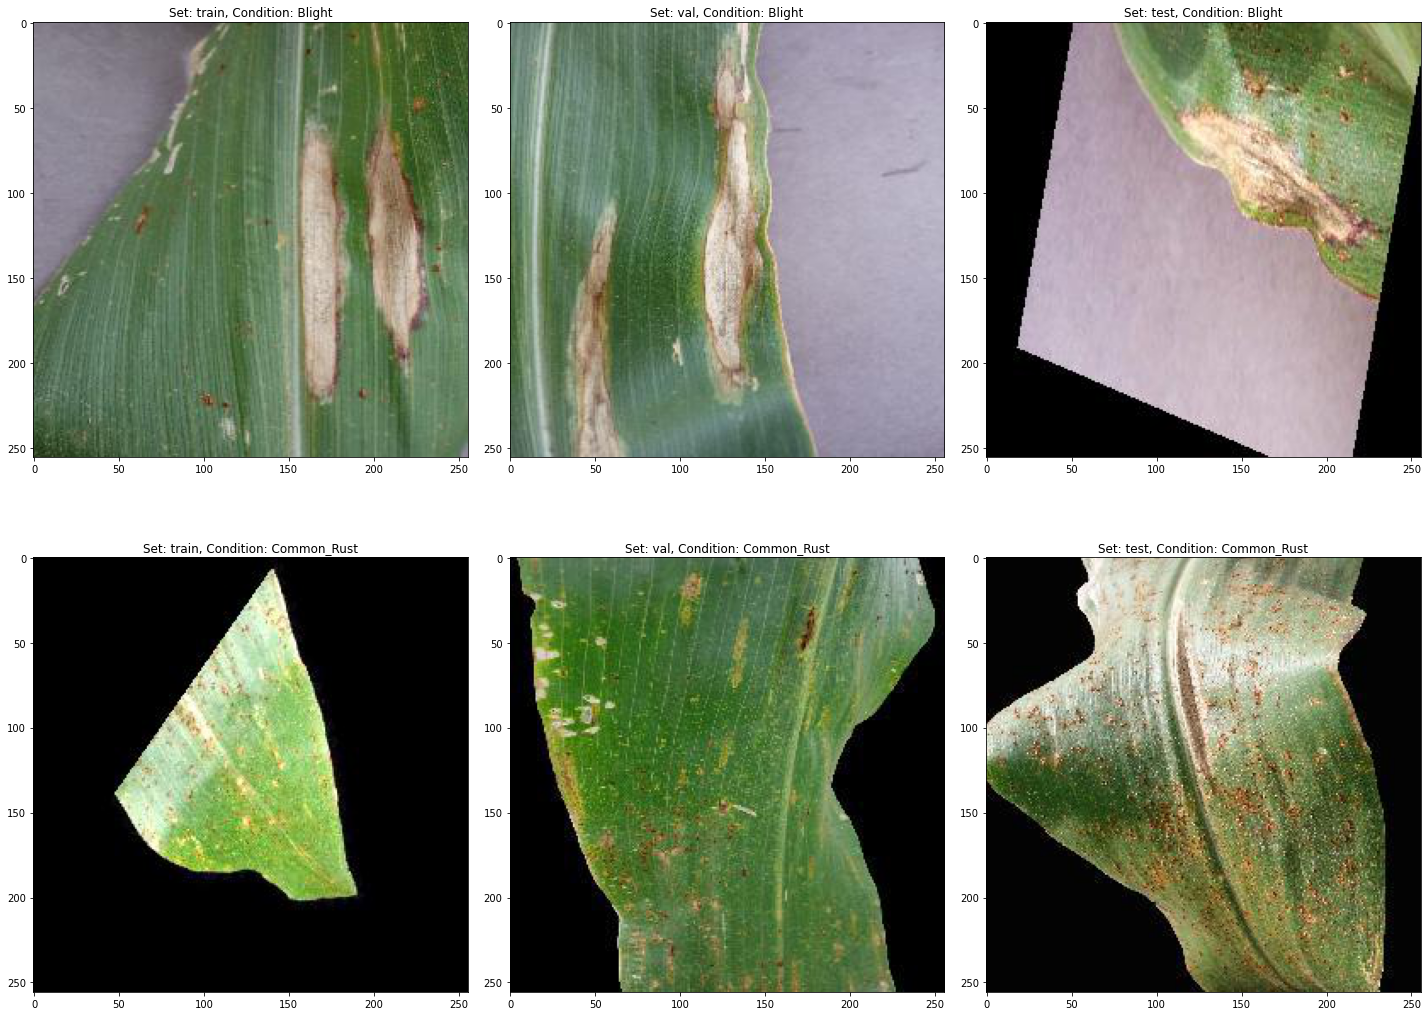

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path_ = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/'

fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val', 'test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Blight/'+os.listdir(set_path+'/Blight')[0]))
    ax[i].set_title('Set: {}, Condition: Blight'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Common_Rust/'+os.listdir(set_path+'/Common_Rust')[0]))
    ax[i+3].set_title('Set: {}, Condition: Common_Rust'.format(set_))

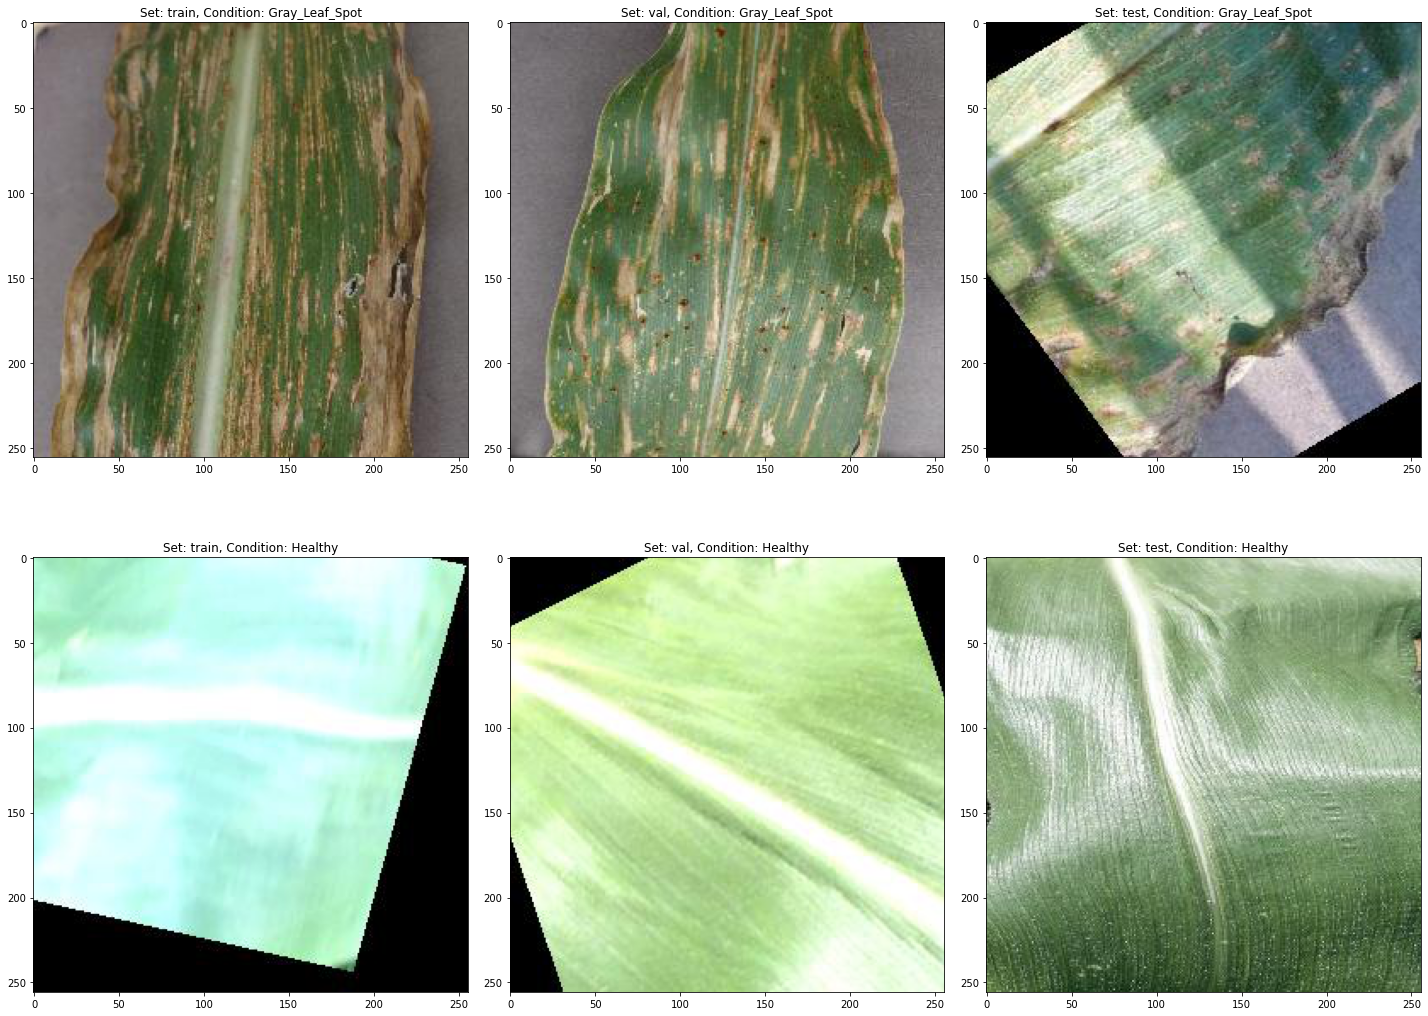

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val','test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Gray_Leaf_Spot/'+os.listdir(set_path+'/Gray_Leaf_Spot')[0]))
    ax[i].set_title('Set: {}, Condition: Gray_Leaf_Spot'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Healthy/'+os.listdir(set_path+'/Healthy')[0]))
    ax[i+3].set_title('Set: {}, Condition: Healthy'.format(set_))

## **Prepare Data For Model Training and Validation**

In [ ]:
# Define the directories for the training, validation, and testing data:
train_dir = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/train/'
val_dir = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/val/'
test_dir = '/content/drive/MyDrive/project_phase_2/Leaf_Disease_Aug/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators for the training, validation, and testing data:
batch_size = 128

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=batch_size, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224),
                                                batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224),
                                                  batch_size=batch_size, class_mode='categorical')

Found 7636 images belonging to 4 classes.
Found 952 images belonging to 4 classes.
Found 956 images belonging to 4 classes.


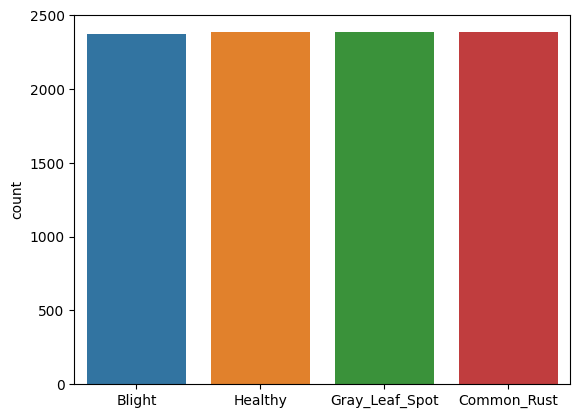

In [ ]:
# Plot a histogram of the label distribution after oversampling
sns.countplot(x=labels)
plt.show()